Option Pricing using Black Scholes and Monte Carlo Simulation assuming no Dividend Yield

In [47]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2/2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2/2) * T) / (stdev * np.sqrt(T)) 

def delta(S, K, r, stdev, T):
    return norm.cdf(d1(S, K, r, stdev, T))

def theta(S, K, r, stdev, T):
    return (-S * norm.pdf(d1(S, K, r, stdev, T)) * stdev / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T))) 

def rho(S, K, r, stdev, T):
    return K * T * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)) / 100

def gamma(S, K, r, stdev, T):
    return norm.pdf(d1(S, K, r, stdev, T)) / (S * stdev * np.sqrt(T))

def vega(S, K, r, stdev, T):
    return S * norm.pdf(d1(S, K, r, stdev, T)) * np.sqrt(T) / 100

def BSM(S, K, r, stdev, T):
    return (S* norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T)) * norm.cdf(d2(S,K,r,stdev,T))

In [60]:
#Pricing Options using Black Scholes Pricing Model

In [21]:
#Download Prices from YFinance
ticker = '^SPX'
data = yf.download(ticker, start = '2014-01-01', end = '2024-09-08')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.head()

Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
Name: Adj Close, dtype: float64

In [13]:
#Price of Underlying is the Last Price
S = data.iloc[-1]
S

5408.419921875

In [17]:
#Calculate the Daily Log Returns
log_returns = np.log(1 + data.pct_change())

In [33]:
#Annualized st dev
stdev = log_returns.std() * 250 ** 0.5
stdev

0.17458658280965586

In [75]:
#Risk free rate is the yield of the 10 yr Govt Bond. The Strike Price is USD 5500 expiring on 7th Oct 2024
r = 3.72/100
K = 5500
T = 1/12
q = 1.32/100

In [99]:
#Price using Black-Scholes Model
BSM(S, K, r, stdev, T)

array([[ 76.19159368,  76.19159368,  76.19159368, ...,  76.19159368,
         76.19159368,  76.19159368],
       [ 66.40384088,  79.87255051,  74.9168862 , ...,  88.98641971,
         75.86224347,  64.55789869],
       [ 61.0150514 ,  77.75274701,  62.34304494, ...,  82.80792117,
         72.36440517,  61.18482214],
       ...,
       [284.11113526,  63.06587688,  18.3984555 , ..., 229.76041547,
        135.06936612,   8.55896714],
       [294.14826954,  65.08155814,  17.96115961, ..., 221.55909175,
        127.29578456,   7.32665135],
       [312.98571002,  70.06822924,  17.66801875, ..., 214.40676373,
        150.54268   ,   7.6041126 ]])

In [37]:
#Price using Monte Carlo Simulation

In [39]:
T = 1/12
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [41]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [77]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

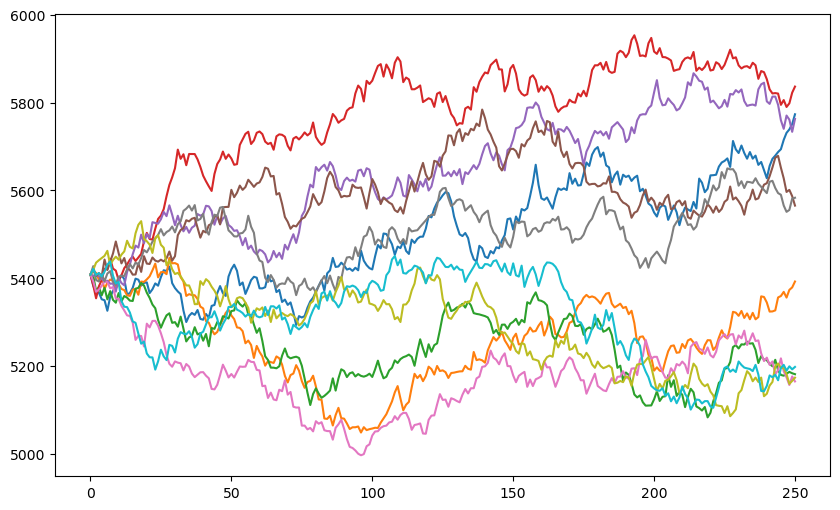

In [79]:
plt.figure(figsize = (10,6))
plt.plot(S[:,:10]);

In [81]:
p = np.maximum(S[-1] - K,0)

In [83]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

73.20429910948316